In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('../')
from src.models import evaluate_model, DataSplitDict
from src.preprocessing import set_types_encoded

# Load and preprocess data
original_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/original_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/original_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

pca_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

# Standardize features
original_data['X_train'] = original_data['X_train'].apply(pd.to_numeric, errors='coerce')
original_data['X_test'] = original_data['X_test'].apply(pd.to_numeric, errors='coerce')


## Supervised Learning

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


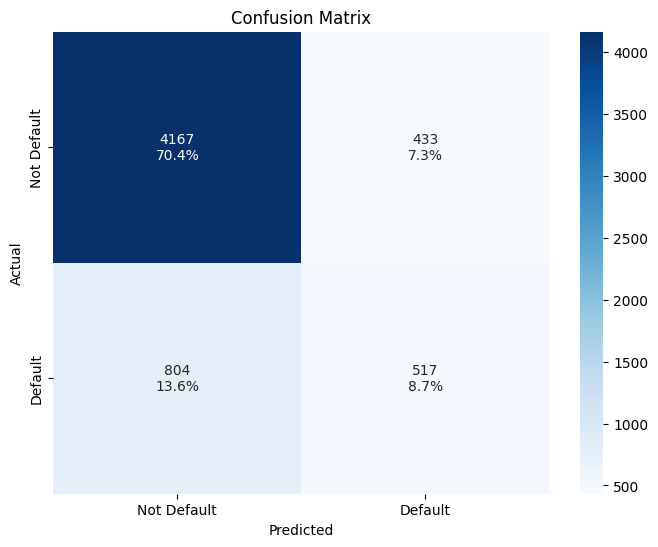

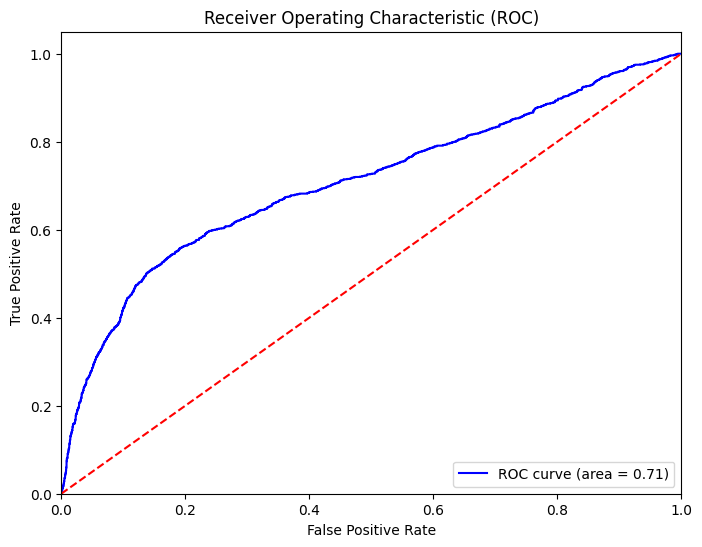

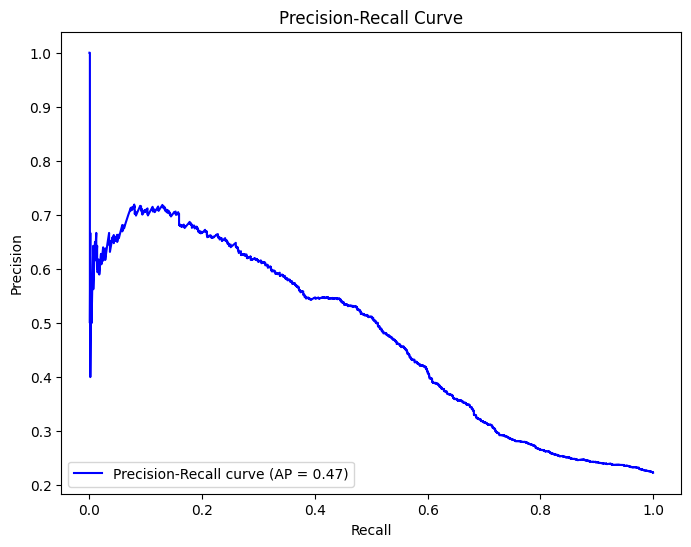

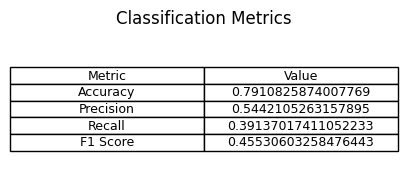

Results for Naive Bayes Classifier on PCA Data:


In [11]:
from src.models import NaiveBayesClassifier

results = NaiveBayesClassifier(pca_data, plotsQ=True, save_path='../plots/models/NaiveBayes/PCA')
print("Results for Naive Bayes Classifier on PCA Data:")

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Best n_neighbors: 21
Best cross-validated accuracy: 0.8063344594594595


/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


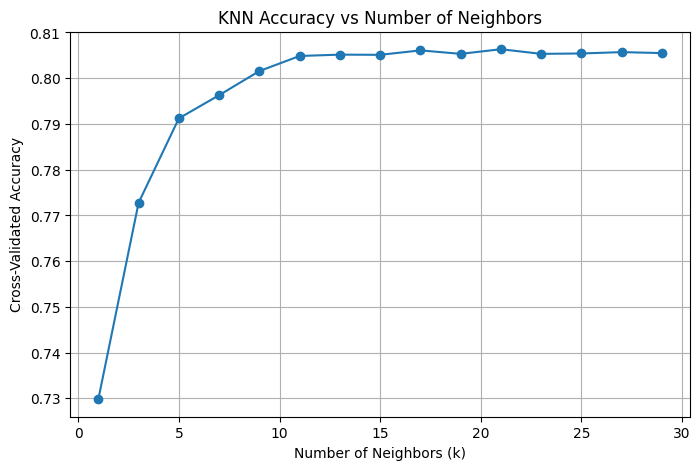

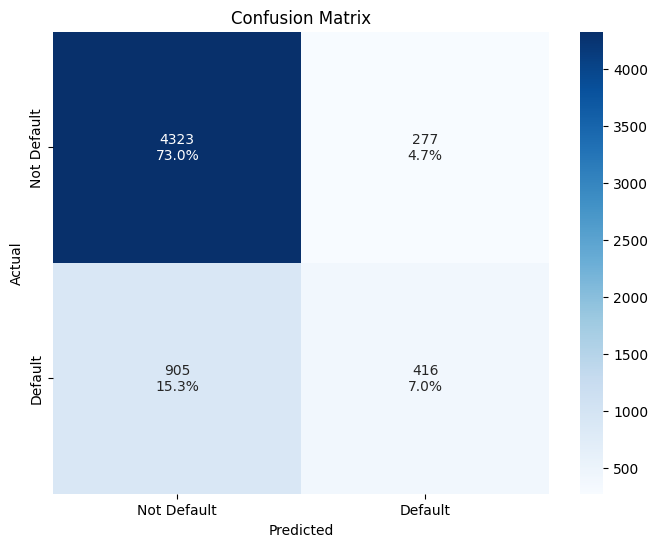

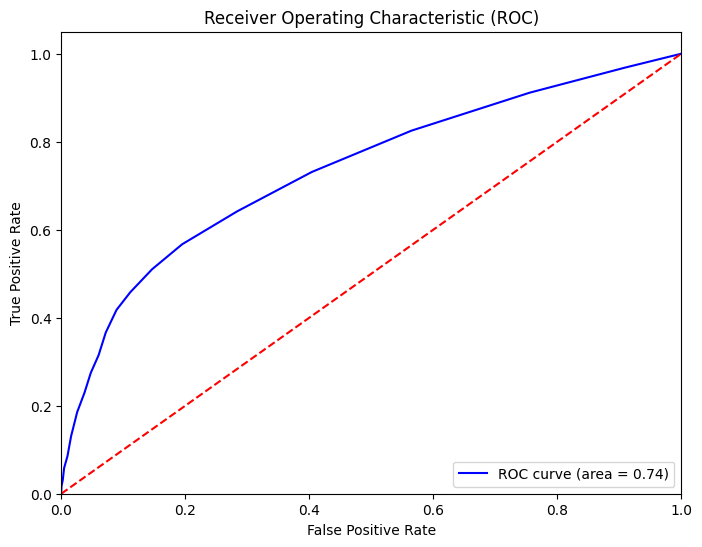

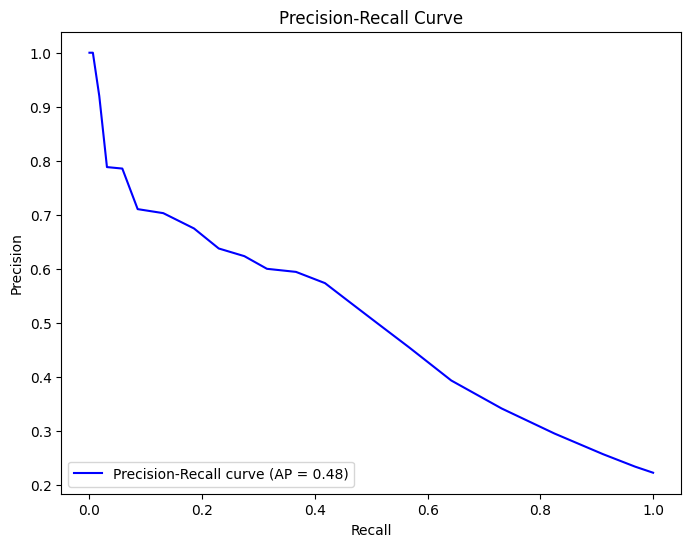

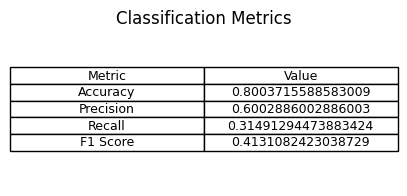

KNN results: (KNeighborsClassifier(n_neighbors=21), {'confusion_matrix': array([[4323,  277],
       [ 905,  416]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      0.94      0.88      4600\n           1       0.60      0.31      0.41      1321\n\n    accuracy                           0.80      5921\n   macro avg       0.71      0.63      0.65      5921\nweighted avg       0.78      0.80      0.78      5921\n', 'actual_default_rate': default payment next month    0.223104
dtype: float64, 'predicted_default_rate': np.float64(0.11704104036480324), 'roc_curve': {'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.34782609e-04,
       2.39130435e-03, 4.56521739e-03, 1.00000000e-02, 1.58695652e-02,
       2.56521739e-02, 3.73913043e-02, 4.76086957e-02, 6.02173913e-02,
       7.17391304e-02, 8.91304348e-02, 1.11304348e-01, 1.46521739e-01,
       1.95000000e-01, 2.83913043e-01, 4.04130435e-01, 5.64782609e-01,
       

In [12]:
# Apply K-Nearest Neighbors (KNN) for credit card default prediction

from src.models import KNNClassifier

results = KNNClassifier( pca_data, test_cases_n=list(range(1, 30, 2)), plotsQ=True, save_path='../plots/models/KNN/PCA/')
print("KNN results:", results)

## Decision Trees

### Original data

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(original_data['X_train'], original_data['y_train'])

print("Best parameters:", grid.best_params_)

# Plot accuracy vs max_depth
scores = grid.cv_results_['mean_test_score']
depths = [str(d) for d in param_grid['max_depth']]
plt.figure(figsize=(7, 4))
plt.plot(depths, scores[:len(depths)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs max_depth')
plt.grid(True)
plt.show()

# Feature importance plot for best estimator
best_dt = grid.best_estimator_
importances = best_dt.feature_importances_
features = original_data['X_train'].columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar([features[i] for i in indices[:10]], importances[indices[:10]])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importances (Decision')

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
